<a href="https://colab.research.google.com/github/albertoakel/Atividades_EBAC/blob/master/notebook/Teste_de_hipotese_exemplos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # Teste t de Student
 A distribuição t de Student é usada quando o tamanho da amostra é pequeno (n < 30) e o desvio padrão populacional é desconhecido.


**Contexto:**\
Suponha que você tenha uma amostra de notas de alunos em uma prova e queira testar se a média das notas é significativamente diferente de 7.0 (um valor de referência).

**Definir as hipóteses:**
*   $H_o$: A média das notas é igual a 7.0 (hipótese nula)
*   $H_1$A média das notas é diferente de 7.0 (hipótese alternativa).

**Coletar os dados:** \
notas = [6.5, 7.2, 6.8, 7.5, 6.9, 7.1, 6.7, 7.4, 6.6, 7.3]

**Calcular**:

*   Média das amostras($\bar{x}$)
*   Desvio Padrão das amostras (s) \
Assim, podemos avaliar o valor de teste-t:
$$t=\frac{( \bar{x}-\mu_o)\sqrt{\nu}}{s}$$
onde $\nu$ graus de liberdade($\nu=n-1$). calculando a média, desvio podemos calcular o valor de t, assim: \
$\bar{x}$ = 7.0 \
$s$ = 0.316 \
Finalmente: $t = 0$

In [39]:
import numpy as np
import math as ma
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats
from IPython.display import display, Math
from scipy import integrate
from scipy.stats import norm


#1)-As médias das notas é significamente diferente de 7?
#Teste t de Student
#Ho as notas tem média 7
#Ha as notas são diferente de 7
notas=[6.5, 7.2, 6.8, 7.5, 6.9, 7.1, 6.7, 7.4, 6.6, 7.3];
muo=7
ho=7
#calcular média e desvio das amostas
x=np.mean(notas)
s=np.std(notas)
t=(x-ho)/(s/np.sqrt(len(notas)))

print('Média:',x)
print('Desvio padrão:',s)
print('teste-t:',t)

Média: 7.0
Desvio padrão: 0.33166247903554
t: 0.0



### Cálculo valor-P
**Passos** \
1) Para um teste bicaudal o valor-p é definido por:
$$P_{valor}= 2P(T>|t|)$$
Assim, como nosso valor t=0, chegamos que $P_{valor}= 2P(T>0)$.
Nosso primeiro calculo aqui é encontrar a probabilidade acumulada até o valor de t, assim encontrar $P(T <)$. Matematicamente estamos falando de uma expressão do tipo:
$$S(t)=\sum_{i=1}^{t} f(x_i)$$

Onde f(x) é nossa distribuição( seja ela qual for) e S(t) é nossa distribuição acumulada até o valor t definido.Nada tao complicado.

Em python a operação é bem simples, podemos usar o recurso de soma acumulada *np.cumsum* em nossa distribuição e encontrar nossa soma acumulada até o valor
t=0. o código abaixo exemplifica esta tarefa.
```
y=norm.pdf(x,0,1)   # distribuição normal
c=np.cumsum(y)      
c=c/max(c)          # para normalizar os valores entre 0-1.
id=np.where(x>=t)   # para encontrar o indice de x que correspondente
temp=id[0][0]
print(c[temp])      #para imprimir o valor de C(t).
```
O exercicio vale a pena para entendimento dos processos, porém aqui faremos de forma mais objetiva e adotaremos alguns pacotes do módulo **scipy.stats, como norm.cdf que executa exatamente a mesma coisa**.

Text(0.5, 0, 'fig 2')

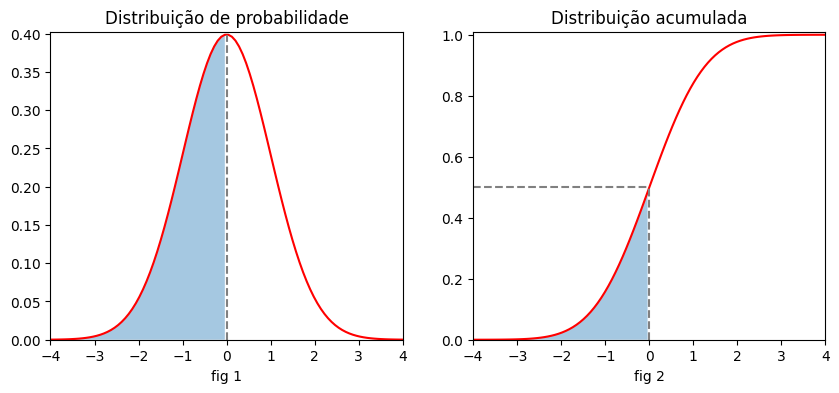

In [37]:
x = np.linspace(-4,4,100)
y=norm.pdf(x,0,1);

c=norm.cdf(x,0,1)
y_cdf = norm.cdf(t)

fig, ax = plt.subplots(1, 2, figsize=(10, 4))

ax[0].plot(x,y,'r-');
ax[0].set_title('Distribuição de probabilidade')
ax[0].vlines(x=t,ymin=0,ymax=norm.pdf(t,0,1),color='gray',linestyles='dashed',
     label="mean: {:.1f}".format(t))

ax[0].set_ylim(0, max(y)*1.01)
ax[0].set_xlim(-4,4)
condicao = (x <= 0) & (y <= norm.pdf(t,0,1))
ax[0].fill_between(x, y,where=condicao,alpha=0.4);
ax[0].set_xlabel('fig 1')


ax[1].plot(x,c,'r-');
ax[1].set_title('Distribuição acumulada')
ax[1].vlines(x=t,ymin=0,ymax=y_cdf,color='gray',linestyles='dashed',
     label="mean: {:.1f}".format(t))
ax[1].hlines(y=y_cdf,xmin=-4,xmax=t,color='gray',linestyles='dashed',
     label="mean: {:.1f}".format(t))
ax[1].set_ylim(0, max(c)*1.01)
ax[1].set_xlim(-4,4)
#preenchimento da região
ax[1].fill_between(x, c,where=c <= y_cdf,alpha=0.4);
ax[1].set_xlabel('fig 2')



Nas duas figuras observamos o comportamento

In [ ]:
import numpy as np
import math as ma
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats
from IPython.display import display, Math
from scipy import integrate


#Exemplo1. notas
#1)-As médias das notas é significamente diferente de 7?
#2) Ho=media das notas 7( mu)
#  H1 média é diferente de 7
#3)
notas = [6.5, 7.2, 6.8, 7.5, 6.9, 7.1, 6.7, 7.4, 6.6]
ho=7


#4)
t=(np.mean(notas)-ho)/np.std(notas)/np.sqrt(len(notas))

#5) P-valor. 3 situações

# bicaudal mu diferente ho   -- pvalue=2P(T>|t|) %nosso caso. pvalue=2P(T>0)) P=0
# a direira mu > h0          -- pvalue=P(T>t)
# a esquerda mu < ho         -- pvalue=P(T<t)

resultado = stats.ttest_1samp(notas, ho)

print("Estatística t:", resultado.statistic)
print("Valor-p:", resultado.pvalue)
print('Como o valor-p é maior que 0,05, não rejeitamos a hipótese nula')

#Estatística t: Mede quantos desvios padrão a média da amostra está distante do valor de referência.
#Como o valor-p é maior que 0,05, não rejeitamos a hipótese nula.
#Conclusão: Não há evidências suficientes para afirmar que a média das notas é diferente de 7.0.

Estatística t: -0.28284271247461795
Valor-p: 0.7844779352140983
Como o valor-p é maior que 0,05, não rejeitamos a hipótese nula


In [ ]:
#Exemplo3
#Da página 83 de Dalgaard [R267] , suponha que a ingestão diária
#de energia para 11 mulheres em Kj seja:

ingestao  =  np . array ([ 5260. ,  5470 ,  5640 ,  6180 ,  6390 ,  6515 ,
                          6805 ,  7515 , 7515 ,  8230 ,  8770 ])

ho=7725
med=np.mean(ingestao)
std=np.std(ingestao,ddof=1)
n=len(ingestao)
gl=len(ingestao)-1
s = np.random.standard_t(gl, size=10000) #distribuição
t = (np.mean(ingestao)-ho)/(ingestao.std(ddof=0)/np.sqrt(len(ingestao)))
p_value=np.sum(s<t) / float(len(s))

print('p-value',p_value)
resultado = stats.ttest_1samp(ingestao, ho)
print("Estatística t:", resultado.statistic)
print("Valor-p:", resultado.pvalue)
print('Como o valor-p é menor que 0,05, rejeitamos a hipótese nula')
print('Como o valor-p é menor que 0,05, rejeitamos a hipótese nula')



p-value 0.0072
Estatística t: -2.8207540608310193
Valor-p: 0.018137235176105812
Como o valor-p é menor que 0,05, rejeitamos a hipótese nula


In [ ]:
#Exemplo1 com n>500
np.random.seed(42)  # Para reproducibilidade
n=1000
notas = np.random.normal(7,1, size=n) # 1000 notas com média 7 e desvio padrão 1

# Valor de referência
ho = 7.0

# Realizar o teste t para uma amostra
resultado = stats.ttest_1samp(notas, ho)

# Exibir os resultados
print('t-student----------------------------------------------------------------')
print("Estatística t:", resultado.statistic)
print("Valor-p:", resultado.pvalue)

# Interpretação
alpha = 0.05  # Nível de significância
if resultado.pvalue < alpha:
    print("Rejeitamos a hipótese nula (H0). A média das notas é diferente de 7.0.")
else:
    print("Não rejeitamos a hipótese nula (H0). Não há evidências de que a média das notas seja diferente de 7.0.")
#USANDO TESTE Z, quando N grande

import numpy as np
from scipy import stats

# Desvio padrão populacional (conhecido)
std = 1.0

# Tamanho da amostra
n = len(notas)

# Calcular a estatística Z
media_amostra = np.mean(notas)
z = (media_amostra - ho) / (std / np.sqrt(n))

# Calcular o valor-p (teste bicaudal)
p_value = 2 * (1 - stats.norm.cdf(abs(z)))
#Calcular o valor-p (teste unicaudal à esquerda)
#p_value = norm.cdf(z)  # CDF da distribuição normal padrão
#Calcular o valor-p (teste unicaudal à esquerda)
#p_value = 1 - norm.cdf(z)

# Exibir os resultados
print('Z-test--------------------------------------------------------')

print("Estatística Z:", z)
print("Valor-p:", p_value)

# Interpretação
alpha = 0.05  # Nível de significância
if p_value < alpha:
    print("Rejeitamos a hipótese nula (H0). A média das notas é diferente de 7.0.")
else:
    print("Não rejeitamos a hipótese nula (H0). Não há evidências de que a média das notas seja diferente de 7.0.")





t-student----------------------------------------------------------------
Estatística t: 0.6243089585093
Valor-p: 0.5325672436623152
Não rejeitamos a hipótese nula (H0). Não há evidências de que a média das notas seja diferente de 7.0.
Z-test--------------------------------------------------------
Estatística Z: 0.6113332825206605
Valor-p: 0.5409789613993481
Não rejeitamos a hipótese nula (H0). Não há evidências de que a média das notas seja diferente de 7.0.


In [ ]:
import numpy as np
from scipy import stats
from scipy.stats import norm

def teste_hipotese(amostra, valor_referencia, desvio_padrao_populacional=None, hipotese_alternativa='diferente'):
    """
    Realiza um teste de hipótese (Z-test ou t-test) com base na hipótese alternativa fornecida.

    Parâmetros:
        amostra (array-like): A amostra de dados.
        valor_referencia (float): O valor de referência para a hipótese nula (H0).
        desvio_padrao_populacional (float, opcional): O desvio padrão populacional (σ). Se não for fornecido, será usado o t-test.
        hipotese_alternativa (str): A hipótese alternativa. Pode ser 'maior', 'menor' ou 'diferente'.

    Retorna:
        None (os resultados são impressos diretamente).
    """
    # Tamanho da amostra
    n = len(amostra)

    # Média da amostra
    media_amostra = np.mean(amostra)

    # Verificar se o teste é Z ou t
    if desvio_padrao_populacional is not None:
        # Teste Z
        print("Usando o teste Z (desvio padrão populacional conhecido).")
        estatistica = (media_amostra - valor_referencia) / (desvio_padrao_populacional / np.sqrt(n))
        distribuição = norm  # Distribuição normal padrão
    else:
        # Teste t
        print("Usando o teste t (desvio padrão populacional desconhecido).")
        desvio_padrao_amostra = np.std(amostra, ddof=1)  # Desvio padrão amostral
        estatistica = (media_amostra - valor_referencia) / (desvio_padrao_amostra / np.sqrt(n))
        distribuição = stats.t(df=n-1)  # Distribuição t de Student

    # Calcular o valor-p com base na hipótese alternativa
    if hipotese_alternativa == 'maior':
        p_value = 1 - distribuição.cdf(estatistica)  # Teste unicaudal à direita
        tipo_teste = "unicaudal à direita"
    elif hipotese_alternativa == 'menor':
        p_value = distribuição.cdf(estatistica)  # Teste unicaudal à esquerda
        tipo_teste = "unicaudal à esquerda"
    elif hipotese_alternativa == 'diferente':
        p_value = 2 * (1 - distribuição.cdf(abs(estatistica)))  # Teste bicaudal
        tipo_teste = "bicaudal"
    else:
        raise ValueError("Hipótese alternativa inválida. Use 'maior', 'menor' ou 'diferente'.")

    # Exibir os resultados
    print(f"\nMédia da amostra: {media_amostra:.2f}")
    print(f"Estatística do teste: {estatistica:.2f}")
    print(f"Valor-p ({tipo_teste}): {p_value:.4f}")

    # Interpretação
    alpha = 0.05  # Nível de significância
    if p_value < alpha:
        print(f"Rejeitamos a hipótese nula (H0). A média da amostra é significativamente {hipotese_alternativa} que {valor_referencia}.")
    else:
        print(f"Não rejeitamos a hipótese nula (H0). Não há evidências de que a média da amostra seja {hipotese_alternativa} que {valor_referencia}.")


# Exemplo de uso
np.random.seed(42)  # Para reproducibilidade
notas = np.random.normal(7.0, 1.0, size=1000)  # 1000 notas com média 7.2 e desvio padrão 1

# # Teste 1: Verificar se a média é maior que 7.0 (unicaudal à direita)
# print("\nTeste 1: Média maior que 7.0")
# teste_hipotese(notas, valor_referencia=7.0, desvio_padrao_populacional=1.0, hipotese_alternativa='maior')

# # Teste 2: Verificar se a média é menor que 7.0 (unicaudal à esquerda)
# print("\nTeste 2: Média menor que 7.0")
# teste_hipotese(notas, valor_referencia=7.0, desvio_padrao_populacional=1.0, hipotese_alternativa='menor')

# Teste 3: Verificar se a média é diferente de 7.0 (bicaudal)
print("\nTeste 3: Média diferente de 7.0")
teste_hipotese(notas, valor_referencia=7.0, desvio_padrao_populacional=1.0, hipotese_alternativa='diferente')


Teste 3: Média diferente de 7.0
Usando o teste Z (desvio padrão populacional conhecido).

Média da amostra: 7.02
Estatística do teste: 0.61
Valor-p (bicaudal): 0.5410
Não rejeitamos a hipótese nula (H0). Não há evidências de que a média da amostra seja diferente que 7.0.


In [ ]:
# c=np.cumsum(y)
# c=c/max(c)
# id=np.where(x>=0.95)
# p=id[0][0]
# #print('cumsum   0.95:',c[p])
# #print('norm.cdf 0.95:',norm.cdf(0.95))

# plt.plot(x,norm.cdf(x))

# plt.plot(x,c,'--r')
# plt.grid()


# x = np.linspace(-3, 3, 1000)
# mu=0
# sig=1
# k=1/(sig*np.sqrt(2*ma.pi))
# Y=k*np.exp(-0.5*((x-mu)/sig)**2)
# C=np.cumsum(Y)
# C=C/max(C)
# plt.plot(x,C,'+g',alpha=0.1)

# id=np.where(x>=0.95)
# P=id[0][0]
# print('cumsum   0.95:',c[p])
# print('norm.cdf 0.95:',norm.cdf(0.95))
# print('CUMSUM   0.95:',C[P])
